在开始学习PyTorch之前，我们对PyTorch的核心模块进行了梳理。现在PyTorch中的模块主要分为两大类: 原生Torch库下，用于构建灵活神经网络的模块，以及成熟AI领域中，用以辅助具体行业应用的模块。

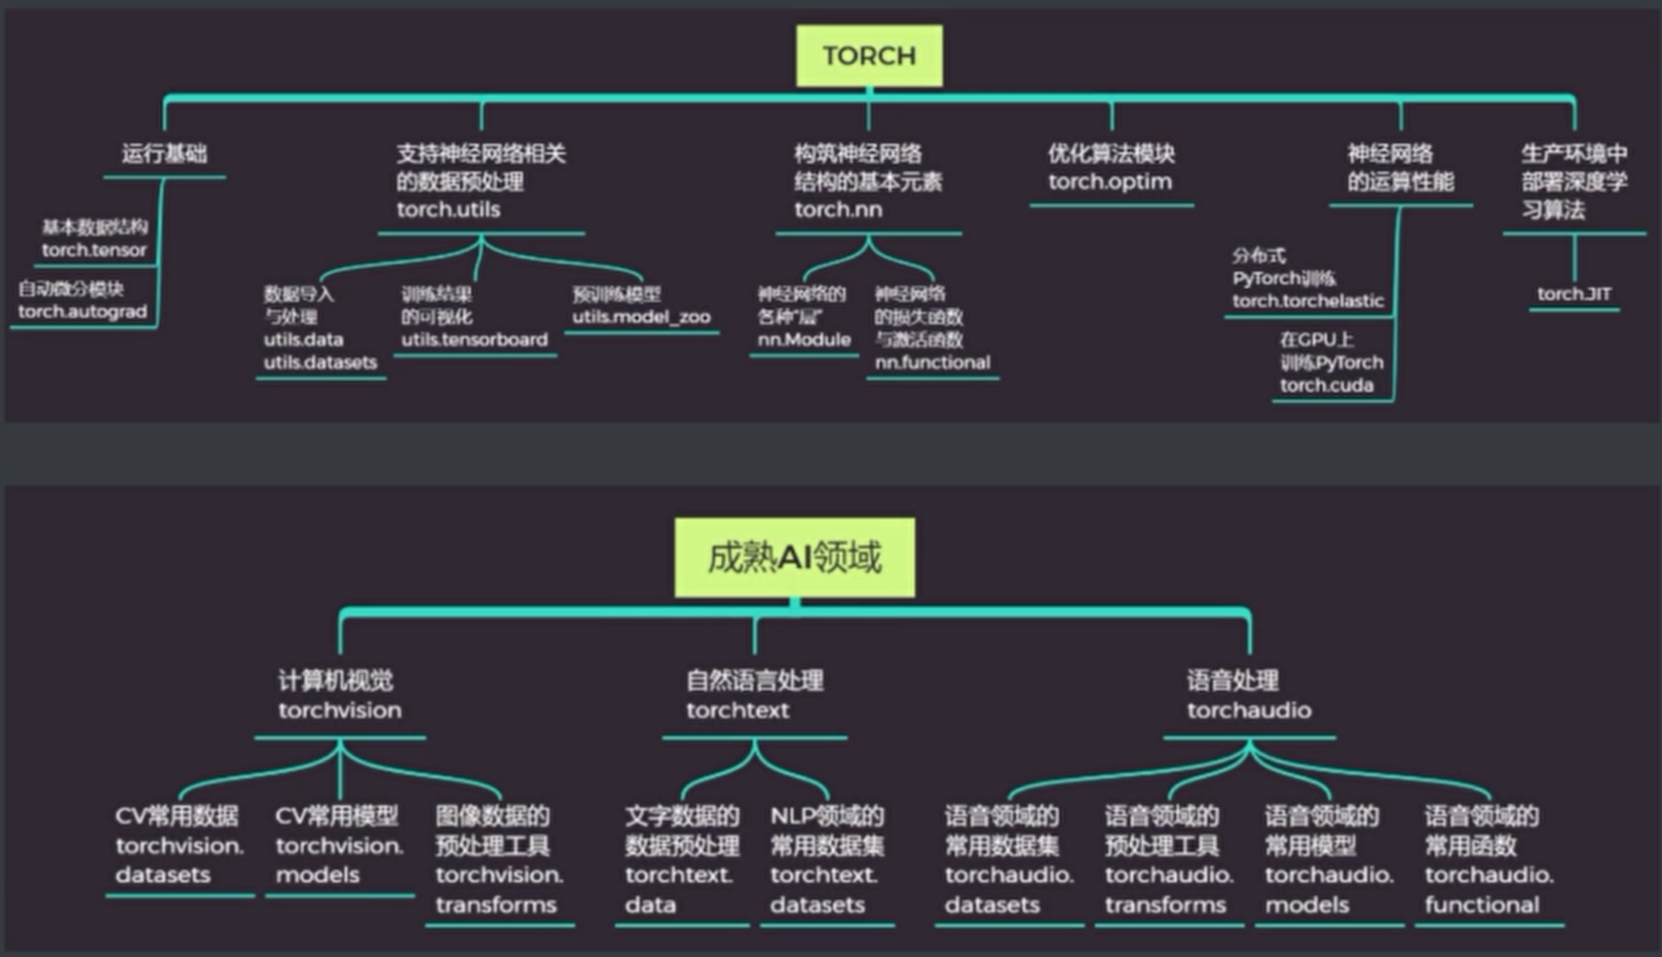

In [1]:
import torch

In [2]:
# z = b + w1x1 + w2x2 ,  z = Xw

In [17]:
# 因为大部份pytorch要判断数据类型，所以在定义的时候给出，降低时间复杂度
X = torch.tensor([[1,0,0],[1,1,0],[1,0,1],[1,1,1.]],dtype = torch.float32)
X

tensor([[1., 0., 0.],
        [1., 1., 0.],
        [1., 0., 1.],
        [1., 1., 1.]])

In [5]:
X.shape

torch.Size([4, 3])

In [27]:
# w顺序（b,w1,w2） 注意 w的b 与 X的截距的顺序
# 大部分时候，张量定义成float32 ，对于标签来说，先定义成二维张量。
w = torch.tensor([-0.2,0.15,0.15],dtype = torch.float32 ).reshape(3,1) # (b,w1,w2)
w

tensor([[-0.2000],
        [ 0.1500],
        [ 0.1500]])

In [15]:
def LinearR(X,w):
    zhat = torch.mm(X,w)
    return zhat

In [24]:
zhat = LinearR(X,w)
zhat

tensor([[-0.2000],
        [-0.0500],
        [-0.0500],
        [ 0.1000]])

In [25]:
z = torch.tensor([-0.2,-0.05,-0.05,0.1],dtype = torch.float32).reshape(4,1)
z

tensor([[-0.2000],
        [-0.0500],
        [-0.0500],
        [ 0.1000]])

    1.很多函数不接受浮点型的分类标签
    2.很多函数要求真实标签的类型与预测标签的类型一致
    3.很多函数不接受一维张量
    4.很多函数不接受二维标签
    大部分时候，张量定义成float32 ，对于标签来说，先定义成二维张量。

In [26]:
zhat == z

tensor([[ True],
        [False],
        [False],
        [False]])

In [29]:
# sse = sigma((真实值 - 预测值)**2)
sse = sum((zhat - z)**2)
sse

tensor([8.3267e-17])

In [30]:
# 设置显示精度，再来看yhat和y_req
# 看小数点后面30位的情况
torch.set_printoptions(precision=30)

In [31]:
zhat

tensor([[-0.200000002980232238769531250000],
        [-0.049999997019767761230468750000],
        [-0.049999997019767761230468750000],
        [ 0.100000008940696716308593750000]])

In [32]:
z

tensor([[-0.200000002980232238769531250000],
        [-0.050000000745058059692382812500],
        [-0.050000000745058059692382812500],
        [ 0.100000001490116119384765625000]])

In [33]:
z == zhat

tensor([[ True],
        [False],
        [False],
        [False]])

fLoat32由于只保留32位，所以精确性会有一些问题<br>
torch.mv这个两数在进行计算的时候，内部计算时会出现一些很微小的精度问题

In [35]:
torch.allclose(z,zhat)

True

规整代码：

In [36]:
import torch
X = torch.tensor([[1,0,0],[1,1,0],[1,0,1],[1,1,1.]],dtype = torch.float32)
w = torch.tensor([-0.2,0.15,0.15],dtype = torch.float32 ).reshape(3,1)
z = torch.tensor([-0.2,-0.05,-0.05,0.1],dtype = torch.float32).reshape(4,1)
def LinearR(X,w):
    zhat = torch.mm(X,w)
    return zhat
zhat = LinearR(X,w)
zhat

tensor([[-0.200000002980232238769531250000],
        [-0.049999997019767761230468750000],
        [-0.049999997019767761230468750000],
        [ 0.100000008940696716308593750000]])